<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [37]:
df = pd.read_csv("./data/Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [38]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [39]:
y = y.reshape(-1, 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [41]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [42]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [43]:
from sklearn.svm import SVR

rgs = SVR(kernel = 'rbf')
rgs.fit(X, y)

c:\Users\GGPC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [44]:
sc_y.inverse_transform(rgs.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

## Visualising the SVR results

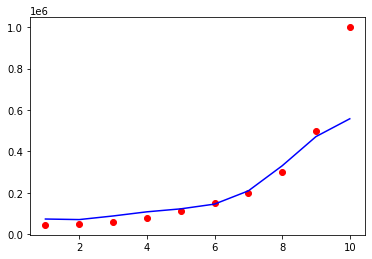

In [45]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), c='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(rgs.predict(X).reshape(-1, 1)), c='blue')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

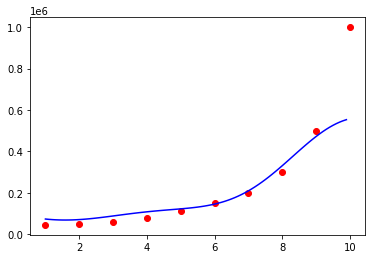

In [51]:
x_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), step=0.1).reshape(-1, 1)

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), c='red')
plt.plot(x_grid, sc_y.inverse_transform(rgs.predict(sc_X.transform(x_grid)).reshape(-1, 1)), c='blue')
plt.show()